# Uçtan Uca Büyük Veride Makine Öğrenmesi

## Spark ve Veri Seti

In [34]:
import findspark
findspark.init("C:\spark")

In [35]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .getOrCreate()

sc = spark.sparkContext

sc

<SparkContext master=local appName=churn_modellemesi>

In [36]:
spark_df = spark.read.csv("churn.csv", header = True, inferSchema = True, sep = ",")

spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [37]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [38]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [39]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [40]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [41]:
# df.columns = map(str.lower, df.columns) <-- pandas'ta yukarıdaki işlemi yapar.

In [42]:
spark_df = spark_df.withColumnRenamed("_c0", "index")

spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [43]:
spark_df.count()

900

In [44]:
len(spark_df.columns)

8

In [45]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [46]:
spark_df.distinct().count()

900

In [47]:
spark_df.select("names").distinct().count()

899

In [48]:
spark_df.groupby("names").count().sort("count", ascending = False).show(5)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|   David Compton|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
|     John Barber|    1|
+----------------+-----+
only showing top 5 rows



In [49]:
# çoklama durumu değil
# iki farklı insan aynı isme sahip

spark_df.filter(spark_df.names == "Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [50]:
# kopyalığı iptal etmek için bunu yaptık.
# spark_df.select("names").distinct().count() yazdığımızda 899 gözükmüştü.
# kopya gibiydi. Bu problemi ortadan kaldırdık.
# çünkü kopya değiller...

spark_df.select("names").dropDuplicates().groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [51]:
spark_df.where(spark_df.index == 439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [52]:
spark_df.where(spark_df.index == 439).collect()[0]

Row(index=439, names='Jennifer Wood', age=48.0, total_purchase=11585.16, account_manager=0, years=4.61, num_sites=9.0, churn=0)

In [53]:
spark_df.where(spark_df.index == 439).collect()[0]["names"]

'Jennifer Wood'

In [54]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

jen

'Jennifer Wood'

In [55]:
type(jen)

str

In [56]:
dir(jen)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [57]:
jen.upper()

'JENNIFER WOOD'

## Keşifçi Veri Analizi

In [58]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [59]:
spark_df.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
index,900,449.5,259.95191863111916,0,899
names,900,None,None,Aaron King,Zachary Walsh
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [60]:
41.81666666666667 + 6.127560416916251

47.94422708358292

In [63]:
spark_df.filter(spark_df.age > 47.94).count()

161

In [64]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [65]:
spark_df.groupby("churn").agg({"total_purchase" : "mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [66]:
spark_df.groupby("churn").agg({"years" : "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [67]:
kor_data = spark_df.drop("index", "names", "churn").toPandas()

In [68]:
import seaborn as sns

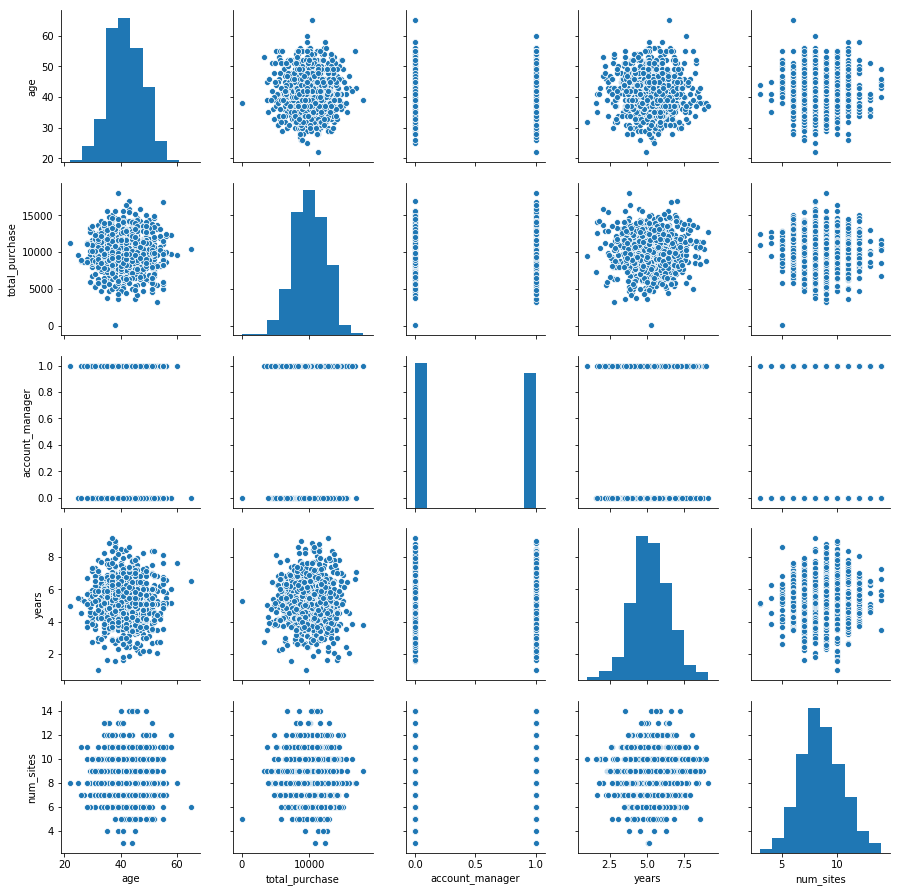

In [70]:
sns.pairplot(data = kor_data);

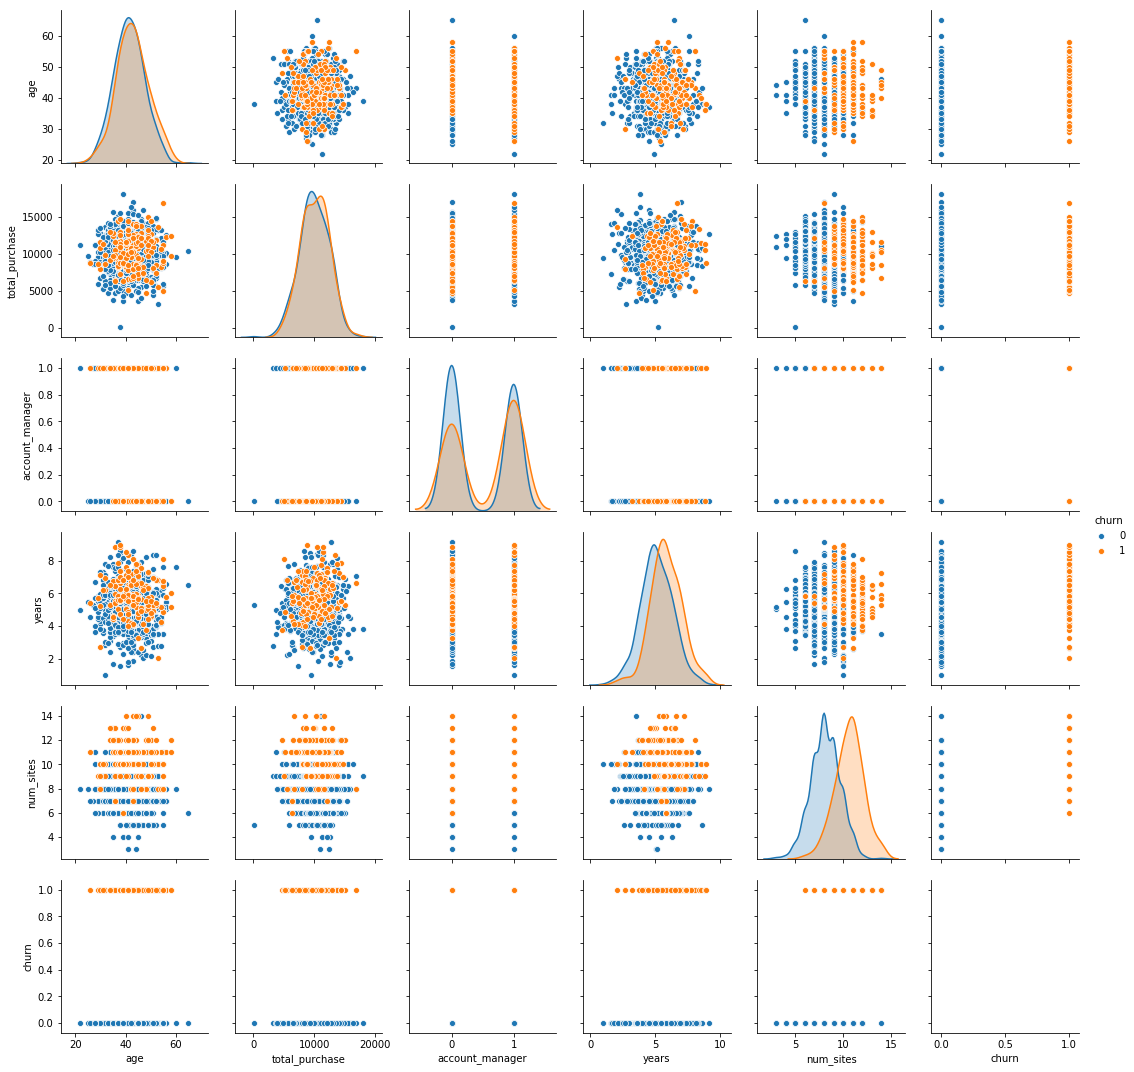

In [73]:
from warnings import filterwarnings

filterwarnings('ignore')

kor_data = spark_df.drop("index", "names").toPandas()

sns.pairplot(data = kor_data, hue = "churn");

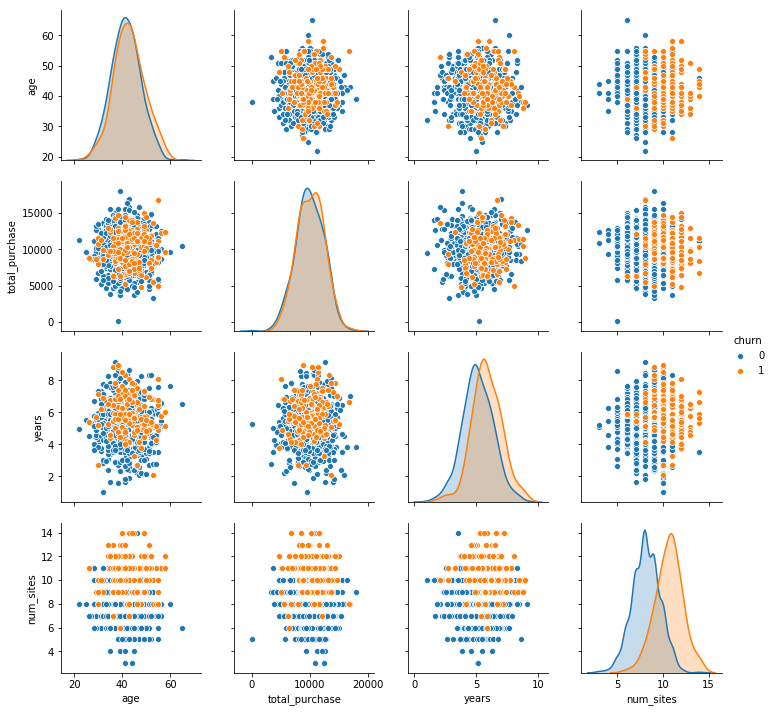

In [75]:
sns.pairplot(data = kor_data, vars = ["age", "total_purchase", "years", "num_sites"], hue = "churn");

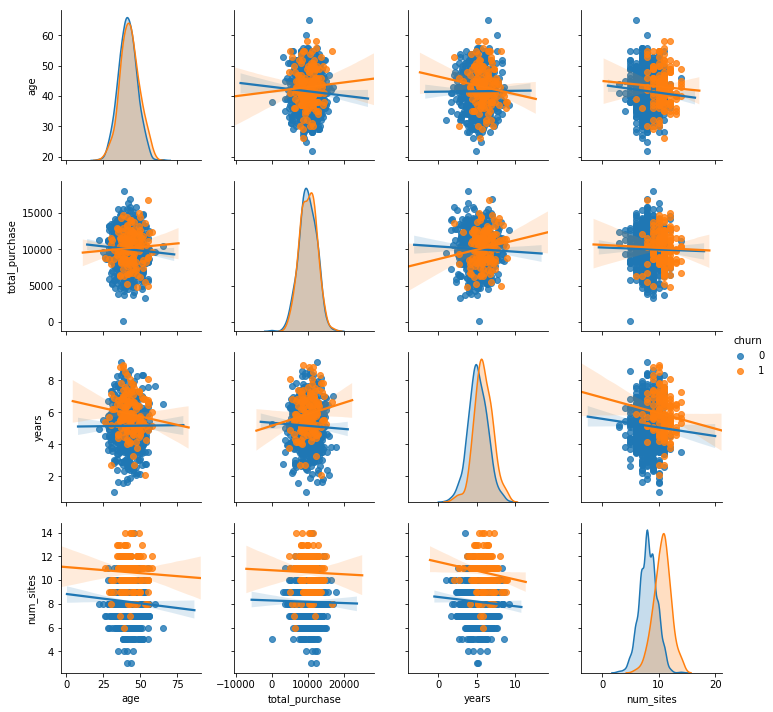

In [76]:
sns.pairplot(data = kor_data, vars = ["age", "total_purchase", "years", "num_sites"], hue = "churn", kind = "reg");

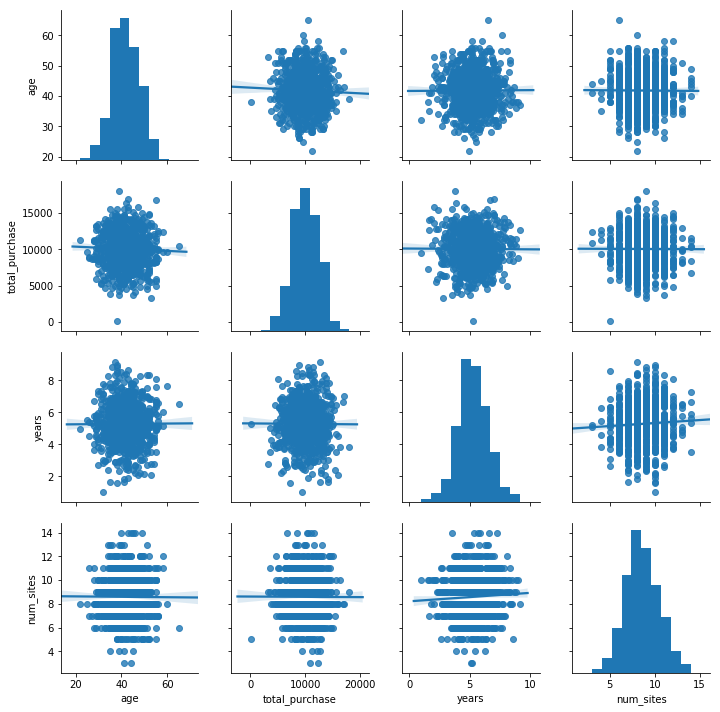

In [77]:
sns.pairplot(data = kor_data, vars = ["age", "total_purchase", "years", "num_sites"], kind = "reg");

## Veri Ön İşleme 

In [78]:
spark_df = spark_df.dropna()

In [80]:
spark_df = spark_df.withColumn("age_kare", (spark_df.age ** 2))

spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 5 rows



In [81]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")

stringIndexer

StringIndexer_2ed54574b537

In [82]:
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_2ed54574b537
File:           c:\spark\python\pyspark\ml\feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed", handleInvalid="error",
...     stringOrderType="frequencyDesc")
>>> model = stringIndexer.fit(stringIndDf)
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).collect()]),
...     key=lambda x: x[0])
[(0, 0.0), (1, 2.0), (2, 1.0), (3, 0.0), (4, 0.0), (5, 1.0)]
>>> inverter = IndexToString(inputCol="indexed", outputCol="lab

In [83]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

indexed

DataFrame[index: int, names: string, age: double, total_purchase: double, account_manager: int, years: double, num_sites: double, churn: int, age_kare: double, label: double]

In [84]:
indexed.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|  1.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|  1.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|  1.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|  1.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|  1.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 5 rows



In [85]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [86]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 5 rows



In [87]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [88]:
# bağımsız değişkenlerin ayarlanması

from pyspark.ml.feature import VectorAssembler

In [90]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [92]:
bag = ["age", "total_purchase", "account_manager", "years", "num_sites"]

bag

['age', 'total_purchase', 'account_manager', 'years', 'num_sites']

In [93]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")

In [94]:
va_df = vectorAssembler.transform(spark_df)

va_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|[38.0,12884.75,0....|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|[42.0,8010.76,0.0...|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|[37.0,9191.58,0.0...|
+-----+----------------+----+--------------+----

In [95]:
final_df = va_df.select(["features", "label"])

final_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
+--------------------+-----+
only showing top 5 rows



In [96]:
# Test-train

splits = final_df.randomSplit([0.7, 0.3])

train_df = splits[0]

test_df = splits[1]

In [97]:
train_df

DataFrame[features: vector, label: int]

In [98]:
test_df

DataFrame[features: vector, label: int]

## GBM ile Müşteri Terk Modellemesi

In [99]:
from pyspark.ml.classification import GBTClassifier

In [101]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

gbm_model = gbm.fit(train_df)

y_pred = gbm_model.transform(test_df)

In [102]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [103]:
y_pred.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[26.0,8787.39,1.0...|    1|[0.20097824336079...|[0.59915763617780...|       0.0|
|[27.0,8628.8,1.0,...|    0|[1.28562286881353...|[0.92898792036554...|       0.0|
|[28.0,11128.95,1....|    0|[1.33972253115882...|[0.93580279326160...|       0.0|
|[29.0,10203.18,1....|    0|[1.36170684815395...|[0.93839417697245...|       0.0|
|[30.0,8677.28,1.0...|    0|[1.22289778376531...|[0.92025344463088...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [104]:
ac = y_pred.select("label", "prediction")

In [106]:
# accuracy

# valide edilmemiş test hatası

ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8880597014925373

In [108]:
gbm_model

GBTClassificationModel (uid=GBTClassifier_477ab734d023) with 10 trees

In [109]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
            .addGrid(gbm.maxDepth, [2, 4, 6])
            .addGrid(gbm.maxBins, [20, 30])
            .addGrid(gbm.maxIter, [10, 20])
            .build())

cv = CrossValidator(estimator = gbm, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 10)

In [110]:
cv_model = cv.fit(train_df)

Exception ignored in: <function JavaWrapper.__del__ at 0x0000020E8ED53840>
Traceback (most recent call last):
  File "C:\spark\python\pyspark\ml\wrapper.py", line 40, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'GBTClassifier' object has no attribute '_java_obj'


In [111]:
y_pred = cv_model.transform(test_df)

ac = y_pred.select("label", "prediction")

In [114]:
ac.filter(ac.label == ac.prediction).show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 5 rows



In [115]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9029850746268657

In [116]:
# eğri altında kalan alan

evaluator.evaluate(y_pred)

0.888034665921163

## Bu müşteriler bizi terk eder mi ?

In [117]:
import pandas as pd

names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])

age = pd.Series([38, 43, 34, 50, 40])

total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])

account_manager = pd.Series([1,0,0,1,1])

years = pd.Series([20, 10, 3, 8, 30])

num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

In [118]:
yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [119]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


In [120]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [121]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [122]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [123]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)

In [126]:
yeni_musteriler.show()

+----------------+---+--------------+---------------+-----+---------+--------------------+
|           names|age|total_purchase|account_manager|years|num_sites|            features|
+----------------+---+--------------+---------------+-----+---------+--------------------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|[38.0,30000.0,1.0...|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|[43.0,10000.0,0.0...|
|   Harika Gündüz| 34|          6000|              0|    3|        8|[34.0,6000.0,0.0,...|
|   Polat Alemdar| 50|         30000|              1|    8|        6|[50.0,30000.0,1.0...|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|[40.0,100000.0,1....|
+----------------+---+--------------+---------------+-----+---------+--------------------+



In [124]:
sonuclar = cv_model.transform(yeni_musteriler)

In [125]:
sonuclar.select("names","prediction").show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+

